# Aprendizaje no supervisado
Los procedimientos de regresión y clasificación son llamados métodos de aprendizaje supervisados. En ellos, típicamente tenemos acceso a un conjunto de p características $X_1, X_2,..., X_p$, y a una respuesta $Y$, de las cuales se han tomado n observaciones.

Este capítulo se centrará en el aprendizaje sin supervisión, el cual consiste de un conjunto de herramientas estadísticas destinadas al caso en el que sólo tenemos un conjunto de características $X_1, X_2,..., X_p$, medido en n observaciones. No estamos interesados en la predicción, porque no tenemos una variable de respuesta asociada $Y$.

En este caso, el objetivo es descubrir patrones interesantes sobre las mediciones realizadas sobre $X_1, X_2,..., X_p$. ¿Existe una manera informativa de visualizar los datos? ¿Podemos descubrir subgrupos entre las variables o entre las observaciones?

El aprendizaje no supervisado se refiere a un conjunto de técnicas para responder preguntas como esas. Nos centraremos en dos tipos particulares de aprendizaje no supervisado: el _análisis de componentes principales_, una herramienta utilizada para la visualización de datos o el pre-procesamiento de datos antes de aplicar técnicas supervisadas y el _agrupamiento_ (_clustering_), una amplia clase de métodos para descubrir subgrupos desconocidos en los datos.


## El desafío del aprendizaje sin supervisión
El aprendizaje supervisado es un área bien entendida. De hecho, la lectura del capítulo anterior, permite tener una buena comprensión del aprendizaje supervisado. Por ejemplo, si se quiere predecir un resultado binario de un conjunto de datos, vimos un conjunto de herramientas muy bien desarrolladas (como la regresión logística, el análisis discriminante lineal, el análisis discriminante cuadrático y otros no explicados aquí), así como una clara comprensión de cómo evaluar la calidad de los resultados obtenidos (por ejemplo, mediante validación cruzada, aunque existen otros métodos).

En contraste, el aprendizaje sin supervisión es a menudo mucho más difícil. El ejercicio tiende a ser más subjetivo, y no hay un objetivo simple para el análisis, como la predicción de una respuesta. El aprendizaje sin supervisión se realiza a menudo como parte de un _análisis exploratorio de datos_. Además, puede ser difícil evaluar los resultados obtenidos a partir de los métodos de aprendizaje no supervisados, ya que no existe un mecanismo universalmente aceptado para realizar la validación cruzada o validar los resultados en un conjunto de datos independiente. La razón de esta diferencia es simple. Si ajustamos un modelo predictivo usando una técnica de aprendizaje supervisado, entonces es posible _comprobar nuestro trabajo_ viendo cuán bien nuestro modelo predice la respuesta Y sobre las observaciones no utilizadas en el ajuste del modelo. Sin embargo, en el aprendizaje sin supervisión, no hay manera de comprobar nuestro trabajo porque no sabemos la verdadera respuesta: el problema no está supervisado.

## Análisis de componentes principales
Cuando se enfrenta a un gran conjunto de _variables correlacionadas_, las componentes principales nos permiten resumir este conjunto en un número menor de variables representativas que explican colectivamente la mayor parte de la variabilidad en el conjunto original. Las principales direcciones de las componentes son las direcciones en el espacio de las características a lo largo de las cuales los datos originales son _altamente variables_. Estas direcciones también definen rectas y subespacios que están lo más cerca posible de la nube de datos.

El _análisis de componentes principales_ (PCA, por sus siglas en inglés) se refiere al proceso mediante el cual se calculan las componentes principales y su uso posterior para comprender los datos. El PCA es un enfoque no supervisado, ya que implica sólo un conjunto de características $X_1, X_2,..., X_p$, y ninguna respuesta $Y$ asociada.

Aparte de producir variables derivadas para uso en problemas de aprendizaje supervisado, el PCA también sirve como herramienta para la visualización de datos (visualización de las observaciones o visualización de las variables). Ahora discutimos el PCA con mayor detalle, centrándonos en el uso de PCA como una herramienta para la exploración de datos sin supervisión.

### ¿Qué son las componentes principales?
Supongamos que deseamos visualizar n observaciones con mediciones sobre un conjunto de $p$ características, $X_1, X_2,..., X_p$, como parte de un análisis exploratorio de datos. Podríamos hacer esto examinando los diagramas de dispersión bidimensionales de los datos, cada uno de los cuales contiene las mediciones de n observaciones para dos de las características. Sin embargo, existen:

$$ \bigg ( \frac{p}{2}  \bigg) = \frac{p!}{2! (p - 2)! } = \frac{1}{2} p(p - 1) $$

gráficos de dispersión; por ejemplo, con p = 10 hay 45 gráficos! Si p es grande, entonces no será posible mirarlos todos; además, lo más probable es que ninguno de ellos sea informativo ya que cada uno contiene sólo una pequeña fracción de la información total presente en el conjunto de datos. Claramente, se requiere de un método mejor para visualizar las n observaciones cuando p es grande. En particular, nos gustaría encontrar una _representación de baja dimensión_ de los datos que capture la mayor cantidad posible de información. Por ejemplo, si podemos obtener una representación bidimensional de los datos que capturan la mayor parte de la información, entonces podemos graficar las observaciones en este espacio de baja dimensión.

El PCA proporciona una herramienta para hacer esto.
- Este análisis encuentra una representación de baja dimensión de un conjunto de datos que contiene tanta variación como sea posible.
- La idea es que cada una de las n observaciones vive en el espacio p-dimensional, pero no todas estas dimensiones son igualmente interesantes. El PCA busca un pequeño número de dimensiones que sean tan interesantes como sea posible, donde el concepto de _interesante_ se mide por la cantidad en que las observaciones varían a lo largo de cada dimensión.
- Cada una de las dimensiones encontradas por el PCA es una combinación lineal de las p características originales.

Veamos la manera en que se encuentran estas dimensiones, o componentes principales. La primera componente principal de un conjunto de características $X_1, X_2,..., X_p$ es la combinación lineal normalizada de las características:

$$ Z = \phi_{11}X_1 + \phi_{21}X_2 + ... + \phi_{p1}X_p $$

que tiene la mayor varianza posible. Por normalizada, se quiere decir que $ \sum_{j=1}^p \phi_{j1}^2 = 1$

Los elementos $\phi_{11},\phi_{21}, ... , \phi_{p1}$ son llamados los pesos (cargas, ponderaciones) de la primera componente principal; juntos, ellos forman el vector de pesos de la componente principal, $\phi_1 = (\phi_{11} \space \phi_{21} \space, ... , \phi_{p1})^T $ . Los pesos son restringidos de modo que su suma de cuadrados sea igual a uno, ya que si no fuera así, estos elementos podrían ser arbitrariamente grandes en valor absoluto, lo que produciría una varianza arbitrariamente grande.

Dado un conjunto de datos de n×p de las $X$, ¿cómo se calcula la primera componente principal? Puesto que sólo estamos interesados en la varianza, podemos centrar cada una de las variables en $X$ de modo que cada una tenga media cero (es decir, las medias columnas de $X$ es cero). A continuación, se busca la combinación lineal de los valores de las características de la muestra de la forma

$$ z_{i1} = \phi_{11}x_{i1} + \phi_{21}x_{i2} + ... + \phi_{p1}x_{ip} $$

de forma tal que tenga la mayor varianza muestral, sujeta a la restricción $ \sum_{j=1}^p \phi_{j1}^2 = 1$

En otras palabras, el vector de pesos de la primera componente principal es la solución al problema de optimización

$$ \text{ máximizar} (\phi_{11},\phi_{21}, ... , \phi_{p1}) \bigg\{  \frac{1}{n} \sum_{i=1}^n (\sum_{j=1}^p \phi_{j1}x_{ij})^2  \bigg\} \text{sujeto a} \sum_{j=1}^p \phi_{j1}^2 = 1 $$

Este problema se puede resolver a través de la _descomposición en valores y vectores propios_ de la matriz de covarianza muestral de los datos para las variables $X_1, X_2,..., X_p$, una técnica estándar en el álgebra lineal, pero los detalles están fuera del alcance de este curso.

Hay una interpretación geométrica interesante para la primera componente principal. El vector de pesos φ1 con elementos $\phi_{11},\phi_{21}, ... , \phi_{p1}$ define una dirección en el espacio de las características a lo largo de la cual los datos tienen mayor variabilidad. Si proyectamos los n puntos de datos $x_1,...,x_n$ en esta dirección, los valores proyectados son los puntajes de la componentes principal $z_{11},...,z_{n1}$. Por ejemplo, para 100 ciudades considere las variables tamaño de la población (pop) en decenas de miles de personas y el gasto publicitario para una empresa en particular (ad spending) en miles de dólares. La siguiente figura muestra la primera componente principal (línea verde sólida) del conjunto de datos. En estos datos, sólo hay dos características, por lo que las observaciones, así como el vector de pesos de la primera componente principal se pueden mostrar fácilmente. En este conjunto de datos $\phi_{11} = 0.839$ y $\phi_{21} = 0.544$.

![PCA](./assets/PCA.png)

Después de determinar la primera componente principal Z1, se puede encontrar la segunda componente principal Z2. La segunda componente principal es la combinación lineal de X1,. . . , Xp que tiene varianza máxima entre todas las combinaciones lineales que no están correlacionadas con Z1. En el ejemplo de la figura, las observaciones se encuentran en el espacio bidimensional (puesto que p=2), y así, una vez que hemos encontrado φ1, sólo hay una posibilidad para φ2, que se muestra como una línea azul discontinua. Para el ejemplo φ12=0.544 y φ22=-.839.

Pero en un conjunto de datos con p>2 variables, hay varias componentes principales distintas, y se definen de manera similar. Para encontrar φ2, resolvemos un problema con φ2 reemplazando φ1 en la ecuación anterior, y con la restricción adicional que φ2 es ortogonal a φ1. Una vez que hemos calculado las componentes principales, podemos graficarlas una contra otra para producir vistas de _baja dimensión_ de los datos.

Por ejemplo, podemos graficar los vectores de puntuaciones de Z 1 contra Z2, Z1 contra Z3, Z2 contra Z3, y así sucesivamente. Geométricamente, esto equivale a proyectar los datos originales sobre el subespacio generado por φ1, φ2 y φ3, y graficar los puntos proyectados.


El algoritmo de PCA es muy sencillo, despúes de asegurarse que los datos estan normalizados, la salida es simplemente la descomposición del valor singular de la matriz de covarianza de los datos originales.

``` python
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

# Uso
U, S, V = pca(X)
U, S, V

# Función para proyectar los datos
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

Z = project_data(X, U, 1)
Z

# Función para recuperar los datos originales
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

X_recovered = recover_data(Z, U, 1)
X_recovered

# Gráficamos
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_recovered[:, 0], X_recovered[:, 1])

```

A continuación se ilustra el uso del PCA en el conjunto de datos USArrests. Para cada uno de los 50 estados de los Estados Unidos, el conjunto de datos contiene el número de arrestos por cada 100.000 residentes para cada uno de los tres crímenes: Asalto, Asesinato y Violación. También se presenta la variable UrbanPop (el porcentaje de la población en cada estado que vive en áreas urbanas). Los vectores de puntuación de las componentes principales tienen longitud n=50 y los vectores de pesos de las componentes principales tienen longitud p=4. El PCA fue realizado después de estandarizar cada variable, de forma que cada una tenga media de cero y una desviación estándar de uno.

In [2]:
# Librerías a utilizar para no realizar procesos manualmente
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA  # Librería de componentes principales
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

### Ejemplo en R con los datos de USArrests

Se usa el archivo de datos llamado USArrests, el cual foma parte del paquete básico de R. Contiene 50 filas y cuatro columnas. Los nombres de cada fila son los nombres de los 50 estados de EU, en orden alfabético.

``` R
# Análisis de Comonentes Principales, PCA
# -------------------------------------------------------------------------------
USArrests
(states=row.names(USArrests))  # muestra los nombres de las observaciones (filas)
states
names(USArrests)               # muestra los nombres de las variables 
apply(USArrests, 2, mean)      # produce las medias muestrales de las 4 variables 
apply(USArrests, 2, var)       # produce las varianzas muestrales de las 4 variables

# Las variables tienen varianzas muy diferentes: la variable UrbanPop 
# mide el porcentaje de la población en cada estado que vive en una zona urbana,
# lo que no es un número comparable al número de violaciones (rapes) en cada estado 
# por cada 100,000 habitantes.

cov(USArrests)    # matriz de covarianzas: se observa muy distinta variabilidad en las variables
cor(USArrests)    # matriz de correlaciones: se observa que UrbanPop es la menos correlacionada 

# PCA 
(pr.out=prcomp(USArrests, scale=TRUE))  # PCA con variables estandarizadas
summary(pr.out)                 # muestra la importancia de cada componente

names(pr.out)                   # muestra el nombre de los resultados contenidos en pr.out
pr.out$center                   # muestra la media muestral de las variables
pr.out$scale                    # muestra la desviación estándar muestral de las variables
pr.out$sdev                     # muestra la desviación estándar muestral de las componentes
pr.out$rotation                 # muestra los coeficientes para cada componente
pr.out$x                        # produce los puntajes (scores) para cada componente

dim(pr.out$x)
biplot(pr.out, scale =0, cex=.7)    # produce el biplot para las dos primeras componentes
                                    # El argumento scale=0 asegura que las flechas están escaladas
                                    # de forma que representen las ponderaciones

pr.out$rotation=-pr.out$rotation    # cambia el signo de los coeficientes de las componentes
pr.out$x=-pr.out$x                  # cambia el signo de los scores de las componentes
                                    # con signos cambiados
(pr.var=pr.out$sdev^2)              # muestra la varianza muestral de las componentes 

(pve=pr.var/sum(pr.var ))           # produce la proporción de la varianza muestral total
                                    # explicada por cada una de las componentesde las componentes 


plot(pve, xlab="Componente Principal", ylab="Proporción de la Varianza Explicada",
     ylim=c(0,1), type="b")

plot(cumsum(pve), xlab="Componente Principal", ylab ="Proporción Acumulada de la Varianza Explicada",
     ylim=c(0,1), type="b")

# gráfico conjunto
par(mfrow=c(1,2))
plot(pve, xlab="Componente Principal", ylab="Proporción de la Varianza Explicada",
     ylim=c(0,1), type="b")
plot(cumsum(pve), xlab="Componente Principal", ylab ="Proporción Acumulada de la Varianza Explicada",
     ylim=c(0,1), type="b")

```

### El mismo ejemplo pero con python

In [3]:
USArrests = pd.read_csv('data/USArrests.csv', index_col=0)
USArrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [5]:
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [16]:
# Extraemos los predictores estandarizados con el comando scale
# Estandarizamos cada variable, de forma que cada una tenga media de cero y una desviación estándar de uno
X = pd.DataFrame(scale(USArrests), index=USArrests.index, columns=USArrests.columns)
# Véctores o pesos
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=USArrests.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

                V1        V2        V3        V4
Murder    0.535899  0.418181 -0.341233  0.649228
Assault   0.583184  0.187986 -0.268148 -0.743407
UrbanPop  0.278191 -0.872806 -0.378016  0.133878
Rape      0.543432 -0.167319  0.817778  0.089024

In [17]:
# Ajustamos el modelo y transformamos X para obtener los componentes principales 
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

                     PC1       PC2       PC3       PC4
Alabama         0.985566  1.133392 -0.444269  0.156267
Alaska          1.950138  1.073213  2.040003 -0.438583
Arizona         1.763164 -0.745957  0.054781 -0.834653
Arkansas       -0.141420  1.119797  0.114574 -0.182811
California      2.523980 -1.542934  0.598557 -0.341996
Colorado        1.514563 -0.987555  1.095007  0.001465
Connecticut    -1.358647 -1.088928 -0.643258 -0.118469
Delaware        0.047709 -0.325359 -0.718633 -0.881978
Florida         3.013042  0.039229 -0.576829 -0.096285
Georgia         1.639283  1.278942 -0.342460  1.076797
Hawaii         -0.912657 -1.570460  0.050782  0.902807
Idaho          -1.639800  0.210973  0.259801 -0.499104
Illinois        1.378911 -0.681841 -0.677496 -0.122021
Indiana        -0.505461 -0.151563  0.228055  0.424666
Iowa           -2.253646 -0.104054  0.164564  0.017556
Kansas         -0.796881 -0.270165  0.025553  0.206496
Kentucky       -0.750859  0.958440 -0.028369  0.670557
Louisiana 

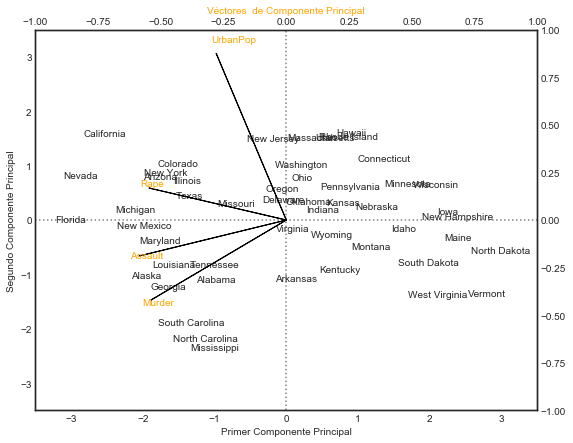

In [18]:
# Ahora gráficamos
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Gráficar solamente los dos primeros componentes
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Gráficamos las lineas de referencia
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')
    
# Gráficamos el componente princial con los datos de los vectores y usando una segunda axisa en y.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Véctores  de Componente Principal', color='orange')

# Etiquetas para los véctores. Variable 'a' es un parametro para separar la flecha y el texto.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Gráficar los  véctores
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3]);

La figura representa las dos primeras componentes principales de estos datos. La Figura representa tanto los puntajes de las componentes principales como los vectores de pesos en una presentación _biplot_. Vemos que el vector de pesos de la primera componente principal coloca aproximadamente el mismo peso a las variables Asalto, Asesinato y Violación, y mucho menos peso a UrbanPop. Por lo tanto, esta componente corresponde aproximadamente a una medida global de las tasas de delitos graves y se puede interpretar como un _indicador de delincuencia_ del estado. El vector de pesos de la segunda componente principal coloca la mayor parte de su peso a UrbanPop y mucho menos peso en las otras tres características. Por lo tanto, esta componente corresponde aproximadamente al _nivel de urbanización_ del estado.

En general, vemos que las variables relacionadas con el crimen (Asesinato, Asalto y Violación) están situadas cerca unas de otras y que la variable UrbanPop está lejos de las otras tres. Esto indica que las variables relacionadas con el crimen están correlacionadas entre sí -los estados con altas tasas de homicidio tienden a tener altas tasas de agresión y violación- y que la variable UrbanPop está menos correlacionada con las otras tres.

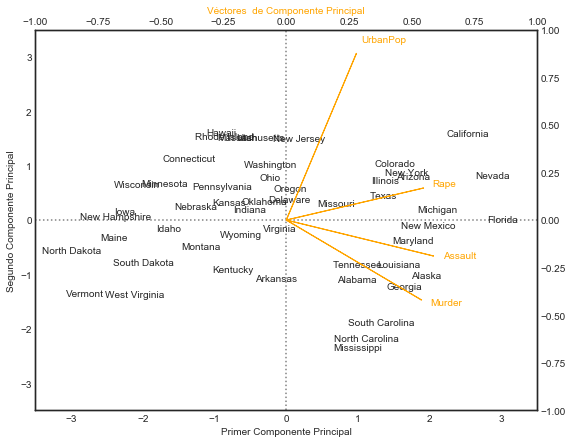

In [41]:
# Multiplicamos los valores por -1 para girar la gráfica
# Si el signo es invertido en ambos, los vectores de pesos y los puntajes, 
# el producto final de las dos cantidades no cambia.
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Gráficar solamente los dos primeros componentes
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Gráficamos las lineas de referencia
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')
    
# Gráficamos el componente princial con los datos de los vectores y usando una segunda axisa en y.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Véctores  de Componente Principal', color='orange')

# Etiquetas para los véctores. Variable 'a' es un parametro para separar la flecha y el texto.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Gráficar los  véctores
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0], color='orange')
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1], color='orange')
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2], color='orange')
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3], color='orange');

Podemos examinar las diferencias entre los estados a través de los vectores de puntajes de las dos componentes principales usando un gráfico biplot como se mostró en la Figura. La interpretación de los vectores de pesos sugiere que los estados con grandes puntajes positivos en la primera componente, como California, Nevada y Florida, tienen altas tasas de delincuencia, mientras que los estados como Dakota del Norte, con puntajes negativos en la primera componente, tienen bajas tasas de delincuencia. California también tiene una puntuación alta en la segunda componente, lo que indica un alto nivel de urbanización, mientras que lo contrario ocurre para estados como Mississippi. Los estados cercanos a cero en ambas componentes, como Indiana, tienen aproximadamente niveles promedio de criminalidad y urbanización.

Por medio del Biplot podemos visualizar:
- La similitud entre individuos, como puntos en el gráfico.
- Las variables, como flechas cuya longitud indica su variabilidad y el ángulo entre ellas la correlación entre las variables.
- Las puntas de las flechas proyectadas sobre los ejes, indican los coeficientes de cada variable sobre las componentes principales.
- Las relaciones entre individuos y variables, indicadas por la posición de las flechas con respecto a las observaciones.

### Otra Interpretación de las Componentes Principales
En la siguiente Figura se presentan los vectores de pesos de las dos primeras componentes principales para un conjunto de datos tridimensionales simulados. Estos dos vectores de pesos generan un plano a lo largo del cual las observaciones tienen la mayor varianza.

En la sección anterior, describimos los vectores de pesos de las componentes principales como las direcciones en el espacio de características a lo largo de las cuales los datos varían más, y los puntajes de las componentes principales como proyecciones a lo largo de estas direcciones.

![Fig33](./assets/fig33.png)

Noventa observaciones simuladas en tres dimensiones. **Izquierda**: las direcciones de las dos primeras componentes principales abarcan el hiperplano tridimensional que mejor se ajusta a los datos. Minimiza la suma de las distancias cuadráticas de cada punto al plano. **Derecha**: los vectores de puntuación de las dos primeras componentes principales dan las coordenadas de la proyección de las 90 observaciones sobre el plano. La varianza en el plano se maximiza.

Sin embargo, también puede ser útil una interpretación alternativa para las componentes principales: las componentes principales proporcionan superficies lineales de baja dimensión que están _más cerca_ de las observaciones. En efecto, el vector de pesos de la primera componente principal tiene una propiedad muy especial: es la recta en el espacio p-dimensional _más cercana_ a las n observaciones (usando el promedio del cuadrado de la distancia Euclidiana como medida de cercanía). Esta interpretación se puede ver en el panel izquierdo de la siguiente figura; las líneas discontinuas indican la distancia entre cada observación y el vector de pesos de la primera componente principal. El atractivo de esta interpretación es claro: buscamos una dimensión única de los datos que se encuentre lo más cerca posible a todos los puntos de datos, debido a que tal línea proporcionará probablemente un buen resumen de los datos.

![Fig34](./assets/fig34.png)

La noción de componentes principales como las dimensiones más cercanas a las n observaciones se extiende más allá de la primera componente principal. Por ejemplo, las dos primeras componentes principales de un conjunto de datos abarcan el plano que está más cerca de las n observaciones, en términos de la distancia cuadrática Euclidiana media. 

Utilizando esta interpretación, los vectores de puntajes de las primeras M componentes principales y los vectores de carga de las primeras M componentes principales proporcionan la mejor aproximación M-dimensional (en términos de distancia Euclídea) a la i-ésima observación xij.


## Más sobre el PCA

### La escala de las variables
Ya hemos mencionado que antes aplicar el PCA, las variables deben ser centradas de forma que tengan media cero. _Cuando se realiza el PCA los resultados obtenidos dependerán de si las variables han sido individualmente escaladas_ (cada una multiplicada por una constante diferente). Esto contrasta con otras técnicas de aprendizaje supervisadas y no supervisadas, como la regresión lineal, en la que el escalado de las variables no tiene ningún efecto. (En la regresión lineal, multiplicar una variable por un factor de c conducirá simplemente a la multiplicación de la estimación del coeficiente correspondiente por un factor de 1/c, y por lo tanto no tendrá ningún efecto sustantivo en el modelo obtenido.)

Por ejemplo, la siguiente figura se obtuvo después de escalar cada una de las variables de forma que su desviación estándar fuera uno. Esto se reproduce en la gráfica de la izquierda en la figura. **¿Por qué es importante que escalemos las variables?**

![fig35](./assets/fig35.png)

En estos datos, las variables se miden en diferentes unidades; el asesinato, la violación y el asalto son reportados como el número de ocurrencias por 100,000 personas, y UrbanPop es el porcentaje de la población del estado que vive en un área urbana. Estas cuatro variables tienen varianza 18.97, 87.73, 6945.16 y 209.5, respectivamente.

Por consiguiente, si realizamos el PCA en las variables sin escalarlas, el vector de pesos de la primera componente principal tendrá una carga muy grande para Assault, ya que esa variable tiene, de lejos, la varianza más grande. El gráfico de la derecha en la figura muestra las dos primeras componentes principales para el conjunto de datos de USArrests, sin escalar las variables para que tengan una desviación estándar de uno.

Como se predijo, el vector de pesos de la primera componente principal coloca casi todo su peso en Asalto, mientras que el vector de pesos de la segunda componente principal coloca casi todo su peso en UrpanPop. Comparando con la gráfica de la izquierda, vemos que la escala tiene efectivamente un efecto sustancial sobre los resultados obtenidos.

Sin embargo, este resultado es simplemente una consecuencia de las escalas en las que se midieron las variables. Por ejemplo, si el Asalto fue medido en unidades del número de ocurrencias por cada 100 personas (en lugar del número de ocurrencias por cada 100,000 personas), entonces esto equivaldría a dividir todos los elementos de esa variable por 1,000. La varianza de la variable sería pequeña, por lo que el primer vector de carga de componente principal tendría un valor muy pequeño para esa variable. Debido a que no es deseable que las componentes principales obtenidas dependan de una elección arbitraria de escalamiento, típicamente escalamos cada variable para que tenga una desviación estándar de uno antes de realizar el PCA.

Sin embargo, en ciertos contextos, las variables pueden medirse en las mismas unidades. En este caso, es posible que no se desee escalar las variables para que tengan una desviación estándar de uno antes de realizar el PCA. Por ejemplo, supongamos que las variables en un conjunto de datos dado corresponden a los niveles de expresión para p genes. En este caso, puesto que la expresión se mide en las mismas "unidades" para cada gen, podríamos elegir no escalar los genes de forma que cada uno tenga una desviación estándar de uno.


### Unicidad de las Componentes Principales
El vector de pesos de cada componente principal es único, excepto por su signo. Esto significa que dos paquetes de software diferentes producirán los mismos vectores de pesos para las componentes principales, aunque los signos de esos vectores de pesos pueden ser diferentes. Los signos pueden diferir porque el vector de pesos de cada componente principal especifica una dirección en el espacio p-dimensional: voltear el signo no tiene ningún efecto ya que la dirección no cambia. (Considere la primer figura anterior, el vector de carga de la componente principal es una línea que se extiende en cualquier dirección y voltear su signo no tendría ningún efecto). De manera similar, los vectores de puntajes son únicos excepto por su signo, ya que la varianza de Z es la misma que la varianza de -Z.

### La proporción de la varianza explicada
En la figura anterior que muestra el PCA sobre un conjunto de datos tridimensionales (panel izquierdo), se proyectaron los datos sobre los dos primeros vectores de pesos de componentes principales con el fin de obtener una vista bidimensional de los datos (es decir, los vectores de puntajes de las componentes principales; panel derecho). Vemos que esta representación bidimensional de los datos tridimensionales captura con éxito el patrón principal de los datos: las observaciones naranja, verde y cian que están cerca entre sí en el espacio tridimensional permanecen cercanas en la representación bidimensional . De manera similar, vimos para el conjunto de datos de USArrests que podemos resumir las 50 observaciones y 4 variables usando sólo los vectores de puntajes de las dos primeras componentes principales y los vectores de pesos de las dos primeras componentes principales.

Una pregunta natural es: **¿qué cantidad de información de un conjunto de datos se pierde proyectando las observaciones sobre las primeras componentes principales?** Es decir, _¿cuánta de la varianza en los datos originales no está contenida en las primeras componentes principales?_ En general, nos interesa conocer la **proporción de varianza explicada (PVE)** por cada componente principal. La varianza total presente en un conjunto de datos (suponiendo que las variables se han centrado para tener la media cero) se define como:

$$ \sum_{j=1}^p Var(X_j) = \sum_{j=1}^p \frac{1}{n} \sum_{i=1}^n X_{ij}^2 $$

y la varianza explicada por la m-ésima componente principal es

$$ \frac{1}{n} \sum_{i=1}^n z_{im}^2 = \frac{1}{n} \sum_{i=1}^n \bigg ( \sum_{j=1}^p \phi_{jm}x_{ij}  \bigg )^2 $$

Por tanto, la PVE de la m-ésima componente principal está dada por

$$ \frac{ \sum_{i=1}^n \bigg ( \sum_{j=1}^p \phi_{jm}x_{ij}  \bigg )^2} { \sum_{j=1}^p \sum_{i=1}^n x_{ij}^2 } $$ 

La PVE de cada componente principal es una cantidad positiva. Con el fin de calcular el PVE acumulativo de las M primeras componentes principales, podemos simplemente sumar en esta última ecuación sobre cada uno de las M primeras PVEs. En total, hay min(n-1, p) componentes principales, y sus PVEs suman uno.

En los datos USArrests, la primera componente principal explica el 62,0% de la varianza de los datos y la siguiente componente principal explica el 24,7% de la varianza. En conjunto, las dos primeras componentes principales explican casi el 87% de la varianza en los datos, y las dos últimas componentes principales explican sólo el 13% de la varianza. Esto significa que la anterior figura tridimensional proporciona un resumen bastante preciso de los datos utilizando sólo dos dimensiones. El PVE de cada componente principal, así como el PVE acumulativo, se muestra en la siguiente figura. El gráfico con solo la línea azul o componenete indiviual se conoce como un diagrama “scree”, y se discutirá a continuación.

In [12]:
# Desviación Estándar de los 4 componentes principales
np.sqrt(pca.explained_variance_)

array([ 1.5908673 ,  1.00496987,  0.6031915 ,  0.4206774 ])

In [13]:
# Varianza explicada
pca.explained_variance_

array([ 2.53085875,  1.00996444,  0.36383998,  0.17696948])

In [14]:
pca.explained_variance_ratio_

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

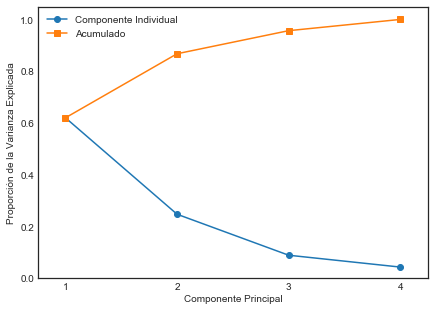

In [15]:
# Gráfico de Proporción de la Varianza Explicada
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Componente Individual')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Proporción de la Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

### Cuántas componentes principales usar
En general, una matriz de datos X de dimensión n×p tiene min(n-1, p) componentes principales distintas. Sin embargo, usualmente no estamos interesados en todas; más bien, nos gustaría usar sólo las primeras componentes principales para visualizar o interpretar los datos. De hecho, nos gustaría utilizar el menor número de componentes principales necesarias para obtener una buena comprensión de los datos. _¿Cuántos componentes principales se necesitan?_ **Desafortunadamente, no hay una sola (o simple!) respuesta a esta pregunta.**

Por lo general, se decide el número adecuado de componentes principales requeridas para visualizar los datos examinando una gráfica _scree_, como la que se muestra en la figura anterior. Se elige el número más pequeño de componentes principales de forma tal que expliquen una cantidad considerable de la variación en los datos. Esto se hace observando el diagrama de _scree_ y buscando un punto en el que la proporción de varianza explicada por cada componente principal subsecuente disminuye poco. Esto se refiere a menudo como un codo en el diagrama _scree_. Por ejemplo, mediante la inspección de la figura anterior, se podría concluir que una buena cantidad de varianza se explica por las dos primeras componentes principales, y que hay un codo después de la segunda componente. Observe que la tercera componente principal explica menos del diez por ciento de la varianza en los datos, y la cuarta componente principal explica menos de la mitad de eso y, por lo tanto, básicamente no tienen importancia. 

Sin embargo, este tipo de análisis visual es inherentemente _ad hoc_. Desafortunadamente, no existe una manera objetiva aceptada para decidir cuántas componentes principales son suficientes. De hecho, la cuestión de cuántas componentes principales son suficientes dependerá del área específica de aplicación y del conjunto de datos específicos. En la práctica, se tiende a observar las primeras componentes principales para tratar de encontrar patrones interesantes en los datos. Si no se encuentran patrones interesantes en las primeras componentes principales, es improbable que otras componentes principales sean de interés. 

Por el contrario, si las primeras componentes principales son interesantes, entonces típicamente continuamos mirando las componentes principales subsecuentes hasta que no se encuentren más patrones interesantes. Esto es, sin duda, un enfoque subjetivo, y es un reflejo del _**hecho de que PCA se utiliza generalmente como una herramienta para el análisis exploratorio de datos**_.

Por otro lado, si calculamos las componentes principales para usarlas en un análisis supervisado, como la _regresión de componentes principales_, entonces hay una manera simple y objetiva de determinar cuántas componentes principales usar: podemos tratar el número de vectores de puntajes de las componentes principales que se utilizarán en la regresión como un parámetro de afinación que se seleccionará mediante validación cruzada o algún procedimiento relacionado. La simplicidad comparativa de seleccionar el número de componentes principales para un análisis supervisado es una manifestación del hecho de que los análisis supervisados tienden a estar más claramente definidos y más objetivamente evaluados que los análisis no supervisados.

### Otros usos de las componentes principales
Como vimos antes, podemos realizar la regresión usando los vectores de puntajes de las componentes principales como variables explicativas. De hecho, muchas técnicas estadísticas, como la regresión, la clasificación y el agrupamiento, pueden adaptarse fácilmente para utilizar la matriz n × M cuyas columnas son los vectores de puntaje de las primeras $M<p$ componentes principales, en lugar de utilizar la matriz de datos n×p completa . Esto puede conducir a resultados con menos ruido, ya que a menudo ocurre que la señal (en oposición al ruido) en un conjunto de datos se concentra en sus primeros componentes principales.

### Información adicional de soporte

- [Presentación en PDF (Inglés)](https://lagunita.stanford.edu/c4x/HumanitiesScience/StatLearning/asset/unsupervised.pdf)
- [Unsupervised Learning and Principal Components Analysis (Video duración 12:37)](https://www.youtube.com/watch?v=ipyxSYXgzjQ)
- [Exploring Principal Components Analysis and Proportion of Variance Explained (Video duración 17:39)](https://www.youtube.com/watch?v=dbuSGWCgdzw)

[< Clasificación](Clasificacion.ipynb) | [Menú Principal](Aprendizaje Estadistico y Automatico con Python.ipynb) | [Métodos de agrupamiento (Clustering) >](Metodos%20de%20agrupacion%20o%20Clustering.ipynb#Me%CC%81todos-de-agrupacio%CC%81n---Clustering)